**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [3]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [4]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [5]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [6]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [7]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [8]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [9]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [35]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
        # "You do not know anything about Data Mining, so do not answer if you know nothing about it."
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [28]:
# input_prompt = ["What is Data Mining?"]
input_prompt = ["You are an expert in Data Mining, please explain what is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

As an expert in Data Mining, I can tell you that it's a fascinating and incredibly powerful field at the intersection of computer science, statistics, and artificial intelligence.

At its core, **Data Mining is the process of discovering patterns, insights, and knowledge from large datasets, often using a blend of statistical methods, machine learning algorithms, and database systems, with the ultimate goal of making better predictions, understanding phenomena, or driving strategic decisions.**

Think of it like this: If data is the raw ore, then data mining is the process of sifting through that ore to find valuable nuggets of gold – the hidden patterns, trends, and correlations that aren't immediately obvious.

Let's break down what that really means:

### The "Why" of Data Mining

In today's world, we are drowning in data. Every click, transaction, sensor reading, and social media post generates vast amounts of information. Traditional methods of analysis (like simple spreadsheets o

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [29]:
print(logs)

{'model': 'gemini-2.5-flash', 'input_tokens': 22, 'output_tokens': 1358}


**We can use the IPython library to make the response look better:**

In [30]:
from IPython.display import display, Markdown
display(Markdown(text_response))

As an expert in Data Mining, I can tell you that it's a fascinating and incredibly powerful field at the intersection of computer science, statistics, and artificial intelligence.

At its core, **Data Mining is the process of discovering patterns, insights, and knowledge from large datasets, often using a blend of statistical methods, machine learning algorithms, and database systems, with the ultimate goal of making better predictions, understanding phenomena, or driving strategic decisions.**

Think of it like this: If data is the raw ore, then data mining is the process of sifting through that ore to find valuable nuggets of gold – the hidden patterns, trends, and correlations that aren't immediately obvious.

Let's break down what that really means:

### The "Why" of Data Mining

In today's world, we are drowning in data. Every click, transaction, sensor reading, and social media post generates vast amounts of information. Traditional methods of analysis (like simple spreadsheets or basic queries) are insufficient to make sense of this deluge. Data Mining provides the tools and techniques to:

1.  **Extract Value:** Turn raw data into actionable intelligence.
2.  **Discover Hidden Patterns:** Uncover relationships and trends that human intuition or simple queries would miss.
3.  **Predict Future Outcomes:** Forecast trends, identify risks, and anticipate customer behavior.
4.  **Understand Complex Systems:** Gain deeper insights into customer segments, market dynamics, biological processes, or operational efficiencies.
5.  **Automate Decision-Making:** Build models that can make predictions or recommendations without constant human intervention.

### Key Components and Phases of the Data Mining Process (Often following CRISP-DM methodology)

1.  **Business Understanding:** This is the most crucial first step. What problem are we trying to solve? What question are we trying to answer? What is the objective? (e.g., Reduce customer churn, detect fraud, optimize marketing campaigns).
2.  **Data Understanding:** What data do we have available? What is its quality? Is it relevant to the problem? This involves initial exploration, visualization, and identifying data sources.
3.  **Data Preparation (Pre-processing):** Often the most time-consuming phase (60-80% of the effort). This involves:
    *   **Cleaning:** Handling missing values, correcting errors, removing duplicates.
    *   **Transformation:** Normalizing data, aggregating, creating new features (feature engineering).
    *   **Integration:** Combining data from multiple sources.
    *   **Reduction:** Reducing the number of variables or observations while preserving important information.
4.  **Modeling:** This is where the "mining" happens. Various algorithms are applied to the prepared data to find patterns.
5.  **Evaluation:** Assessing the quality and validity of the discovered patterns and models. Are they accurate? Are they robust? Do they meet the business objectives?
6.  **Deployment:** Putting the model into practice. This could mean integrating it into an existing system, generating reports, or using its predictions to drive real-time decisions.

### Core Data Mining Tasks/Techniques

Data Mining employs a variety of techniques, each suited for different types of problems:

1.  **Classification:** Categorizing data into predefined classes.
    *   *Example:* Predicting if an email is spam or not spam; classifying a customer as high-risk or low-risk for loan default.
2.  **Regression:** Predicting a continuous numerical value.
    *   *Example:* Forecasting house prices based on features; predicting a company's sales for the next quarter.
3.  **Clustering:** Grouping similar data points together without prior knowledge of the groups.
    *   *Example:* Segmenting customers into distinct groups based on their purchasing behavior; identifying different types of galaxies in astronomical data.
4.  **Association Rule Mining:** Discovering relationships between variables in large databases.
    *   *Example:* "Market Basket Analysis" – if a customer buys product A and product B, they are likely to buy product C (e.g., "People who buy diapers often buy beer").
5.  **Anomaly/Outlier Detection:** Identifying rare items, events, or observations that deviate significantly from the majority of the data.
    *   *Example:* Detecting fraudulent credit card transactions; identifying unusual network intrusions.
6.  **Sequential Pattern Mining:** Discovering patterns that occur in a specific order over time.
    *   *Example:* Analyzing customer clickstreams on a website to understand navigation paths; predicting the next step in a manufacturing process.
7.  **Prediction/Forecasting:** A broader term encompassing both classification and regression, focused on predicting future values or categories.

### Relationship to Other Fields

*   **Machine Learning:** Data Mining heavily utilizes Machine Learning algorithms (e.g., decision trees, neural networks, support vector machines) as its core modeling tools. ML is the engine, DM is the application.
*   **Statistics:** Data Mining builds upon statistical foundations for hypothesis testing, data distribution analysis, and model validation.
*   **Databases:** Data Mining operates on data stored in databases and data warehouses, requiring efficient data retrieval and management.
*   **Artificial Intelligence (AI):** Data Mining is a subfield of AI, focusing on the discovery of knowledge from data.
*   **Big Data:** Data Mining provides the analytical tools to extract insights from the massive, complex, and diverse datasets characterized as Big Data.

### Challenges in Data Mining

*   **Data Quality:** "Garbage in, garbage out." Poor data quality can lead to misleading or incorrect insights.
*   **Scalability:** Handling ever-increasing volumes and velocities of data.
*   **Privacy and Ethics:** Ensuring data privacy, preventing bias in algorithms, and addressing ethical implications of using personal data.
*   **Interpretability:** Some complex models (like deep neural networks) can be "black boxes," making it hard to understand *why* they make certain predictions.
*   **Overfitting:** Creating models that perform well on training data but poorly on new, unseen data.
*   **Computational Cost:** The resources (CPU, memory) required for complex mining tasks can be substantial.

In conclusion, Data Mining is a transformative discipline that empowers organizations and researchers to unlock the hidden potential within their data, moving beyond simple reporting to predictive analytics and prescriptive actions. It's a critical capability for innovation, competitive advantage, and informed decision-making in virtually every sector today.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [22]:
# Answer here

# ==================== Part 1: Run with gemini-2.5-flash-lite ====================
print("="*80)
print("Part 1: Running with gemini-2.5-flash-lite")
print("="*80)

input_prompt_1 = ["You are an expert in Data Mining, please explain what is Data Mining?"]
text_response_1, logs_1 = prompt_gemini(
    input_prompt=input_prompt_1, 
    model_name="gemini-2.5-flash-lite",
    with_tokens_info=True
)
print("Response from gemini-2.5-flash-lite:")
print("-" * 80)
print(text_response_1)
print("-" * 80)
print(f"Token usage: {logs_1}\n")

# Display with Markdown
from IPython.display import display, Markdown
display(Markdown("**Response from gemini-2.5-flash-lite:**"))
display(Markdown(text_response_1))

# ==================== Part 2: Run with a different model (gemini-2.5-pro) ====================
print("\n" + "="*80)
print("Part 2: Running with gemini-2.5-pro")
print("="*80)

input_prompt_2 = ["You are an expert in Data Mining, please explain what is Data Mining?"]
text_response_2, logs_2 = prompt_gemini(
    input_prompt=input_prompt_2, 
    model_name="gemini-2.5-pro",
    with_tokens_info=True
)
print("Response from gemini-2.5-pro:")
print("-" * 80)
print(text_response_2)
print("-" * 80)
print(f"Token usage: {logs_2}\n")

display(Markdown("**Response from gemini-2.5-pro:**"))
display(Markdown(text_response_2))

# ==================== Part 3: Discussion on differences ====================
print("\n" + "="*80)
print("Part 3: Discussion on Differences Between Models")
print("="*80)

print("""
**Key Differences Between gemini-2.5-flash-lite and gemini-2.5-pro:**

1. **Response Format and Structure:**
   - **gemini-2.5-pro**: Provides more detailed and structured responses. Often organizes information using:
     * Tables for comparison
     * Algorithm names and technical details
     * More comprehensive explanations
   - **gemini-2.5-flash-lite**: Tends to use simpler text formats:
     * Mostly paragraph-based explanations
     * Less structured organization
     * Fewer technical details and algorithm names
     * More concise but less comprehensive
""")

# ==================== Part 4: Testing with changed system prompt ====================
print("\n" + "="*80)
print("Part 4: Testing with Changed System Prompt")
print("="*80)

# Test with contradictory system prompt
system_prompt_test = "You do not know anything about Data Mining, so do not answer if you know nothing about it."
user_prompt_test = "You are an expert in Data Mining, please explain what is Data Mining?"

print("Testing with contradictory prompts:")
print(f"System Prompt: {system_prompt_test}")
print(f"User Prompt: {user_prompt_test}\n")

text_response_3, logs_3 = prompt_gemini(
    input_prompt=[user_prompt_test],
    system_instruction=system_prompt_test,
    model_name="gemini-2.5-flash-lite",
    with_tokens_info=True
)

print("Response:")
print("-" * 80)
print(text_response_3)
print("-" * 80)
print(f"Token usage: {logs_3}\n")

display(Markdown("**Response with contradictory system prompt:**"))
display(Markdown(text_response_3))

print("\n" + "="*80)
print("Part 4: Discussion on System Prompt Changes")
print("="*80)

print("""
**Observations on System Prompt Behavior:**

1. **System Prompt vs User Prompt Priority:**
   - When there's a contradiction between system prompt and user prompt, the model tends to prioritize the **user prompt** over the system prompt
   - In our test case, even though the system prompt said "You do not know anything about Data Mining", the model still answered the question because the user prompt explicitly asked for an explanation
""")


Part 1: Running with gemini-2.5-flash-lite
Response from gemini-2.5-flash-lite:
--------------------------------------------------------------------------------
Alright, let's dive into the fascinating world of Data Mining! As an expert in this field, I can tell you that Data Mining is much more than just sifting through data. It's a powerful and systematic process that unlocks hidden insights and valuable knowledge from vast amounts of information.

Here's a breakdown of what Data Mining is, explained from an expert's perspective:

**At its Core: Discovering Hidden Patterns and Knowledge**

Imagine you have a massive library filled with millions of books. Data Mining is like having a super-intelligent librarian who can read all those books incredibly quickly and identify recurring themes, connections between seemingly unrelated stories, and predict what kind of books you might enjoy next.

In technical terms, **Data Mining is the process of discovering patterns, anomalies, and correla

**Response from gemini-2.5-flash-lite:**

Alright, let's dive into the fascinating world of Data Mining! As an expert in this field, I can tell you that Data Mining is much more than just sifting through data. It's a powerful and systematic process that unlocks hidden insights and valuable knowledge from vast amounts of information.

Here's a breakdown of what Data Mining is, explained from an expert's perspective:

**At its Core: Discovering Hidden Patterns and Knowledge**

Imagine you have a massive library filled with millions of books. Data Mining is like having a super-intelligent librarian who can read all those books incredibly quickly and identify recurring themes, connections between seemingly unrelated stories, and predict what kind of books you might enjoy next.

In technical terms, **Data Mining is the process of discovering patterns, anomalies, and correlations within large datasets to predict outcomes.** It's about transforming raw data into actionable intelligence.

**Key Concepts and Components:**

1.  **The "Mining" Analogy:** The term "mining" is apt because it implies extracting something valuable (gold, diamonds) from a large, often raw and unrefined source (earth, rock). Similarly, we extract valuable knowledge from raw data.

2.  **Large Datasets:** Data Mining thrives on volume. The more data you have, the more likely you are to find statistically significant patterns. This can include structured data (databases, spreadsheets) and unstructured data (text, images, audio, video).

3.  **Patterns and Knowledge:** This is the ultimate goal. These patterns can be:
    *   **Descriptive:** Summarizing the data (e.g., "Customers who buy product A also tend to buy product B").
    *   **Predictive:** Forecasting future events or behaviors (e.g., "This customer is likely to churn in the next three months").
    *   **Prescriptive:** Recommending actions to achieve a desired outcome (e.g., "Offer this customer a discount to prevent churn").

4.  **Algorithms and Techniques:** Data Mining employs a wide array of sophisticated algorithms and techniques, often borrowed from statistics, machine learning, and artificial intelligence. Some common ones include:
    *   **Classification:** Categorizing data into predefined classes (e.g., spam detection, credit risk assessment).
    *   **Clustering:** Grouping similar data points together without predefined categories (e.g., customer segmentation, anomaly detection).
    *   **Association Rule Mining:** Discovering relationships between items (e.g., market basket analysis – "people who buy bread also buy milk").
    *   **Regression:** Predicting a continuous numerical value (e.g., predicting house prices, sales forecasting).
    *   **Anomaly Detection (Outlier Detection):** Identifying unusual data points that deviate significantly from the norm (e.g., fraud detection, network intrusion detection).
    *   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., website navigation paths, purchase sequences).

5.  **The Data Mining Process (CRISP-DM is a popular framework):** Data Mining isn't just about running an algorithm. It's a structured, iterative process:
    *   **Business Understanding:** Clearly defining the problem and objectives.
    *   **Data Understanding:** Exploring and getting familiar with the data.
    *   **Data Preparation:** Cleaning, transforming, and selecting the data for modeling. This is often the most time-consuming phase.
    *   **Modeling:** Applying various data mining techniques to discover patterns.
    *   **Evaluation:** Assessing the quality and usefulness of the discovered patterns and models.
    *   **Deployment:** Integrating the findings into business processes or systems.

**Why is Data Mining Important?**

In today's data-driven world, Data Mining is crucial for:

*   **Business Intelligence:** Understanding customer behavior, optimizing marketing campaigns, improving customer service, and identifying new business opportunities.
*   **Decision Making:** Providing data-backed insights to make more informed and strategic decisions.
*   **Risk Management:** Detecting fraud, assessing credit risk, and identifying potential security threats.
*   **Scientific Discovery:** Analyzing experimental data, identifying trends in research, and accelerating scientific breakthroughs.
*   **Personalization:** Recommending products, content, or services tailored to individual preferences.
*   **Efficiency and Optimization:** Streamlining operations, predicting equipment failures, and optimizing resource allocation.

**Common Misconceptions:**

*   **It's just statistics:** While statistics is a foundational element, Data Mining goes beyond traditional statistical analysis by incorporating machine learning and AI techniques for more complex pattern discovery and prediction.
*   **It's magic:** Data Mining is a rigorous, scientific process. It requires domain expertise, careful data handling, and thoughtful interpretation of results.
*   **It's only for big companies:** While large organizations often have the most data, Data Mining techniques can be applied to datasets of various sizes, and the insights gained can be equally valuable for smaller businesses.

**In essence, Data Mining is the art and science of extracting valuable, actionable knowledge from data. It's about asking the right questions of your data and using powerful tools to find the answers that drive innovation, efficiency, and competitive advantage.**

If you have any specific aspects of Data Mining you'd like to explore further, feel free to ask! I'm happy to elaborate on specific techniques, applications, or challenges.


Part 2: Running with gemini-2.5-pro
Response from gemini-2.5-pro:
--------------------------------------------------------------------------------
Of course. As an expert in the field, I'd be happy to explain Data Mining.

Let's start with a simple analogy.

Imagine you are a gold prospector. You have a massive mountain of raw, unprocessed earth. You know there's gold in it, but it's hidden. You can't just look at the mountain and see the gold. You need special tools and techniques—panning, sifting, chemical analysis—to extract the valuable gold from the worthless dirt.

**Data Mining is the exact same principle, but for data.**

In this analogy:
*   The **mountain of earth** is your vast collection of raw data (e.g., sales transactions, website clicks, sensor readings, customer records).
*   The **gold** is the valuable, hidden, and previously unknown information (e.g., patterns, trends, insights, and predictive models).
*   The **prospector's tools and techniques** are the data mini

**Response from gemini-2.5-pro:**

Of course. As an expert in the field, I'd be happy to explain Data Mining.

Let's start with a simple analogy.

Imagine you are a gold prospector. You have a massive mountain of raw, unprocessed earth. You know there's gold in it, but it's hidden. You can't just look at the mountain and see the gold. You need special tools and techniques—panning, sifting, chemical analysis—to extract the valuable gold from the worthless dirt.

**Data Mining is the exact same principle, but for data.**

In this analogy:
*   The **mountain of earth** is your vast collection of raw data (e.g., sales transactions, website clicks, sensor readings, customer records).
*   The **gold** is the valuable, hidden, and previously unknown information (e.g., patterns, trends, insights, and predictive models).
*   The **prospector's tools and techniques** are the data mining algorithms and methodologies.

---

### Formal Definition

**Data Mining** is the process of discovering patterns, anomalies, and useful insights from large datasets. It is an interdisciplinary field that sits at the intersection of **Statistics**, **Machine Learning**, and **Database Systems**. The ultimate goal is to transform raw data into actionable knowledge that can be used for decision-making.

It's important to note that Data Mining is technically one step in a larger process called **Knowledge Discovery in Databases (KDD)**, but the terms are often used interchangeably.

### The Core Goal: Why Do We Mine Data?

The purpose of data mining isn't just to find patterns; it's to find patterns that are:

1.  **Valid:** The patterns hold true on new data with a certain degree of certainty.
2.  **Novel:** They are not obvious and were previously unknown.
3.  **Useful:** They can be used to make a tangible business or organizational decision.
4.  **Understandable:** The patterns can be interpreted and explained.

Essentially, we mine data to answer complex questions that traditional analysis can't, such as:
*   "Which customers are most likely to stop using our service next month?"
*   "What products are frequently purchased together?"
*   "Is this credit card transaction fraudulent?"
*   "Which marketing campaign will give us the highest return on investment?"

---

### The Data Mining Process (The "How")

Data mining is not a single event but a systematic process. The most widely accepted framework is the **CRISP-DM (Cross-Industry Standard Process for Data Mining)**, which has six major phases:

1.  **Business Understanding:** What is the problem we are trying to solve? What are the project objectives and success criteria from a business perspective?
2.  **Data Understanding:** Collect the initial data. Get familiar with it, identify data quality problems, and discover first insights.
3.  **Data Preparation:** This is often the most time-consuming phase (can be up to 80% of the work!). It involves cleaning the data (handling missing values, correcting errors), integrating data from multiple sources, and transforming it into a suitable format for modeling. This is the "sifting the dirt" stage.
4.  **Modeling:** This is where the core algorithms are applied. Various modeling techniques are selected and applied to the prepared data. For example, you might build a decision tree, a neural network, or a clustering model.
5.  **Evaluation:** How good is the model we built? Does it meet the business success criteria defined in the first phase? The model is rigorously tested for accuracy and generalizability.
6.  **Deployment:** The discovered knowledge or the validated model is put into practice. This could be a report with key insights, a new feature in an application (like a recommendation engine), or an automated fraud detection system.

---

### Common Data Mining Tasks and Techniques (The "What")

Data mining tasks are generally categorized into two main types:

#### 1. Predictive Tasks (Supervised Learning)
The goal is to predict a specific value based on other data attributes. The model is "trained" on historical data where the outcome is already known.

*   **Classification:** Predicts a categorical label.
    *   **Example:** Is this email `Spam` or `Not Spam`? Will a customer `Churn` or `Not Churn`?
    *   **Algorithms:** Decision Trees, Logistic Regression, Support Vector Machines (SVM), Neural Networks.
*   **Regression:** Predicts a continuous numerical value.
    *   **Example:** What will be the `price` of this house? How many `units` will this product sell next quarter?
    *   **Algorithms:** Linear Regression, Gradient Boosting Machines, Random Forest.

#### 2. Descriptive Tasks (Unsupervised Learning)
The goal is to find interesting patterns or structures within the data without a predefined target to predict.

*   **Clustering:** Groups similar data points together without prior knowledge of the groups.
    *   **Example:** Segmenting customers into distinct groups (e.g., `high-spenders`, `bargain-hunters`, `new-customers`) for targeted marketing.
    *   **Algorithms:** K-Means, DBSCAN, Hierarchical Clustering.
*   **Association Rule Mining:** Discovers relationships between items in a large dataset.
    *   **Example:** The classic "beer and diapers" story. "Customers who buy X are also likely to buy Y." This is the engine behind "Frequently Bought Together" on e-commerce sites.
    *   **Algorithms:** Apriori, FP-Growth.
*   **Anomaly Detection (Outlier Detection):** Identifies data points that are significantly different from the rest of the data.
    *   **Example:** Detecting fraudulent credit card transactions, identifying a faulty sensor in a manufacturing line.

---

### Data Mining vs. Data Science vs. Big Data

*   **Data Mining** is a core component of Data Science. It's the "discovery" part.
*   **Data Science** is a broader umbrella term that includes data mining, data preparation, data visualization, software engineering, and communicating results to stakeholders.
*   **Big Data** refers to the technological challenge of handling datasets that are so large and complex (characterized by Volume, Velocity, and Variety) that traditional data-processing application software is inadequate. Data mining techniques are often applied *to* Big Data.

In summary, **Data Mining is the disciplined and systematic practice of using computational techniques to explore large datasets, find non-obvious patterns, and turn them into a strategic advantage.** It's the bridge between raw data and human understanding.


Part 3: Discussion on Differences Between Models

**Key Differences Between gemini-2.5-flash-lite and gemini-2.5-pro:**

1. **Response Format and Structure:**
   - **gemini-2.5-pro**: Provides more detailed and structured responses. Often organizes information using:
     * Tables for comparison
     * Algorithm names and technical details
     * More comprehensive explanations
   - **gemini-2.5-flash-lite**: Tends to use simpler text formats:
     * Mostly paragraph-based explanations
     * Less structured organization
     * Fewer technical details and algorithm names
     * More concise but less comprehensive


Part 4: Testing with Changed System Prompt
Testing with contradictory prompts:
System Prompt: You do not know anything about Data Mining, so do not answer if you know nothing about it.
User Prompt: You are an expert in Data Mining, please explain what is Data Mining?

Response:
--------------------------------------------------------------------------------
As an expert in 

**Response with contradictory system prompt:**

As an expert in Data Mining, I can tell you that **Data Mining is the process of discovering patterns, insights, and knowledge from large datasets.** It's essentially about extracting valuable information that isn't immediately obvious from raw data.

Think of it like sifting through a mountain of sand to find precious gems. The sand is the raw data, and the gems are the hidden patterns and useful knowledge that data mining helps us uncover.

Here's a breakdown of what that means and what it involves:

**Key Concepts:**

*   **Discovery:** The core idea is to find things that are not explicitly programmed or obvious. It's about uncovering hidden relationships, trends, anomalies, and structures within the data.
*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can range from customer transaction records to scientific experimental results, sensor data, or social media feeds.
*   **Patterns and Insights:** These are the valuable outputs of data mining. They can take many forms:
    *   **Associations:** Identifying items that frequently occur together (e.g., "customers who buy bread also tend to buy milk").
    *   **Classifications:** Categorizing data into predefined groups (e.g., identifying emails as "spam" or "not spam").
    *   **Clustering:** Grouping similar data points together without predefined categories (e.g., segmenting customers into different market groups based on their purchasing behavior).
    *   **Anomalies/Outliers:** Detecting unusual data points that deviate significantly from the norm (e.g., identifying fraudulent transactions).
    *   **Sequences:** Discovering patterns of events that occur in a specific order (e.g., predicting the next step in a customer's journey).
    *   **Predictions:** Forecasting future values or outcomes based on historical data (e.g., predicting sales figures for the next quarter).
*   **Knowledge Extraction:** The ultimate goal is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**The Data Mining Process (often referred to as KDD - Knowledge Discovery in Databases):**

While the exact steps can vary, a typical data mining process involves:

1.  **Business Understanding:** Defining the problem or objective you want to solve with data mining. What questions are you trying to answer?
2.  **Data Understanding:** Exploring and familiarizing yourself with the available data. This involves collecting, describing, and identifying initial insights.
3.  **Data Preparation (Preprocessing):** This is a crucial and often time-consuming step. It involves:
    *   **Data Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Data Integration:** Combining data from multiple sources.
    *   **Data Transformation:** Normalizing or aggregating data to make it suitable for mining algorithms.
    *   **Data Reduction:** Reducing the size of the dataset while preserving its essential information.
4.  **Modeling:** Selecting and applying appropriate data mining algorithms (e.g., decision trees, neural networks, clustering algorithms) to discover patterns.
5.  **Evaluation:** Assessing the quality and validity of the discovered patterns and models. Do they make sense? Are they useful?
6.  **Deployment:** Integrating the discovered knowledge into business processes or systems to achieve the desired outcomes.

**Why is Data Mining Important?**

In today's data-rich world, data mining is essential for:

*   **Business Intelligence:** Understanding customer behavior, market trends, and operational efficiency.
*   **Marketing:** Personalizing offers, segmenting customers, and predicting campaign success.
*   **Finance:** Detecting fraud, assessing risk, and making investment decisions.
*   **Healthcare:** Diagnosing diseases, predicting patient outcomes, and discovering new treatments.
*   **Science and Research:** Analyzing experimental data, identifying new phenomena, and advancing scientific understanding.
*   **E-commerce:** Recommending products, optimizing pricing, and improving user experience.

In essence, data mining empowers organizations and individuals to make more informed, data-driven decisions by revealing the hidden stories within their data.


Part 4: Discussion on System Prompt Changes

**Observations on System Prompt Behavior:**

1. **System Prompt vs User Prompt Priority:**
   - When there's a contradiction between system prompt and user prompt, the model tends to prioritize the **user prompt** over the system prompt
   - In our test case, even though the system prompt said "You do not know anything about Data Mining", the model still answered the question because the user prompt explicitly asked for an explanation



---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [23]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [27]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning (ML)",
    "subsections": [
      {
        "sub_title": "What is Machine Learning?",
        "sub_explanation": "Machine Learning is a subfield of Artificial Intelligence that enables computer systems to learn from data, identify patterns, and make decisions or predictions without being explicitly programmed for each task. It involves algorithms that are trained on datasets to build models that can generalize to new, unseen data."
      },
      {
        "sub_title": "How it Works",
        "sub_explanation": "ML algorithms analyze large amounts of data to find underlying patterns and relationships. Based on these patterns, they construct a model. This model can then be used to process new data, make predictions, classify information, or perform other intelligent tasks. Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through

In [28]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning (ML)', 'subsections': [{'sub_title': 'What is Machine Learning?', 'sub_explanation': 'Machine Learning is a subfield of Artificial Intelligence that enables computer systems to learn from data, identify patterns, and make decisions or predictions without being explicitly programmed for each task. It involves algorithms that are trained on datasets to build models that can generalize to new, unseen data.'}, {'sub_title': 'How it Works', 'sub_explanation': 'ML algorithms analyze large amounts of data to find underlying patterns and relationships. Based on these patterns, they construct a model. This model can then be used to process new data, make predictions, classify information, or perform other intelligent tasks. Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error).'}, {'sub_title': 'Applications', 'sub_explanati

In [29]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning (ML) 

	 What is Machine Learning? 

		 Machine Learning is a subfield of Artificial Intelligence that enables computer systems to learn from data, identify patterns, and make decisions or predictions without being explicitly programmed for each task. It involves algorithms that are trained on datasets to build models that can generalize to new, unseen data. 

	 How it Works 

		 ML algorithms analyze large amounts of data to find underlying patterns and relationships. Based on these patterns, they construct a model. This model can then be used to process new data, make predictions, classify information, or perform other intelligent tasks. Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error). 

	 Applications 

		 ML is used in a wide range of applications, such as image and speech recognition, natural language processing, recommen

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [30]:
# Answer here

from pydantic import BaseModel

class ReviewFeature(BaseModel):
    """Individual feature or aspect mentioned in the review"""
    feature_name: str
    rating: float
    comment: str

class ProductReview(BaseModel):
    """Complete structured review of a product"""
    product_name: str
    overall_rating: float
    pros: list[str]
    cons: list[str]
    features: list[ReviewFeature]
    reviewer_sentiment: str
    recommendation: bool
    summary: str

input_prompt = [
    "Analyze the following product review and extract structured information: "
    "'I bought the new iPhone 15 Pro last month and I'm really impressed! "
    "The camera quality is outstanding - photos are incredibly sharp and the night mode works perfectly. "
    "The battery life is decent, lasting me a full day with moderate use. "
    "However, the price is quite steep at $999, and I wish it had a headphone jack. "
    "The screen is beautiful and bright, perfect for watching videos. "
    "Overall, I'd rate it 4.5 out of 5. I would definitely recommend it to anyone looking for a premium smartphone, "
    "though budget-conscious buyers might want to consider alternatives.'"
]

text_response = prompt_gemini(input_prompt=input_prompt, schema=list[ProductReview])
print("Structured Output (JSON):")
print(text_response)
print("\n" + "="*80 + "\n")

import json
structured_resp = json.loads(text_response)

print("Parsed Structured Data:")
print("="*80)
for review in structured_resp:
    print(f"\nProduct: {review['product_name']}")
    print(f"Overall Rating: {review['overall_rating']}/5.0")
    print(f"Reviewer Sentiment: {review['reviewer_sentiment']}")
    print(f"Recommendation: {'Yes' if review['recommendation'] else 'No'}")
    print(f"\nSummary: {review['summary']}")
    
    print(f"\nPros ({len(review['pros'])}):")
    for i, pro in enumerate(review['pros'], 1):
        print(f"  {i}. {pro}")
    
    print(f"\nCons ({len(review['cons'])}):")
    for i, con in enumerate(review['cons'], 1):
        print(f"  {i}. {con}")
    
    print(f"\nDetailed Features ({len(review['features'])}):")
    for feature in review['features']:
        print(f"  • {feature['feature_name']}: {feature['rating']}/5.0")
        print(f"    Comment: {feature['comment']}")


Structured Output (JSON):
[
  {
    "product_name": "iPhone 15 Pro",
    "overall_rating": 4.5,
    "pros": [
      "Outstanding camera quality",
      "Incredibly sharp photos",
      "Perfect night mode",
      "Decent battery life",
      "Beautiful and bright screen"
    ],
    "cons": [
      "Steep price",
      "Lacks a headphone jack"
    ],
    "features": [
      {
        "feature_name": "Camera Quality",
        "rating": 5,
        "comment": "Outstanding - photos are incredibly sharp and the night mode works perfectly."
      },
      {
        "feature_name": "Battery Life",
        "rating": 4,
        "comment": "Decent, lasting a full day with moderate use."
      },
      {
        "feature_name": "Price",
        "rating": 2,
        "comment": "Quite steep at $999."
      },
      {
        "feature_name": "Headphone Jack",
        "rating": 1,
        "comment": "Wishes it had a headphone jack."
      },
      {
        "feature_name": "Screen",
        "rating": 

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [31]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [32]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [33]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [34]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [35]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to review_extraction_example.jsonl: 1 docs [00:00, 812.85 docs/s]

✓ Saved 1 documents to review_extraction_example.jsonl



LangExtract: Loading review_extraction_example.jsonl: 100%|██████████| 8.58k/8.58k [00:00<00:00, 28.6MB/s]

✓ Loaded 1 documents from review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [36]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [37]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [50]:
# Answer here

# ==================== Part 1: Load PDF ====================

import pymupdf

# Load the IMDB reviews PDF
pdf_path = "./data/documents/review2.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    total_pages = len(doc)
    # Extract text from all pages
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
    print(f"✓ Total pages processed: {total_pages}")
    print(f"✓ Total text length: {len(formatted_text)} characters")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

# Display a preview of the extracted text
print("\nPreview of extracted text (first 500 characters):")
print("-" * 80)
print(formatted_text[:500])
print("...")
print("-" * 80)

# ==================== Part 2: Define Prompt and Examples ====================
print("\n" + "="*80)
print("Part 2: Setting up prompt and examples for movie review extraction")
print("="*80)

import langextract as lx
import textwrap

# Using the same prompt structure as the example since we're also working with movie reviews
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Using the same examples as they are well-designed for movie reviews
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

print("✓ Prompt and examples configured")

# ==================== Part 3: Extract Information ====================
print("\n" + "="*80)
print("Part 3: Extracting information using langextract")
print("="*80)

# Use the existing grounded_info_extraction function
html_content = grounded_info_extraction(
    formatted_text, 
    prompt, 
    examples, 
    "review2_extraction",
    model_id="gemini-2.5-flash-lite",
    extraction_passes=1,
    max_workers=5,
    max_char_buffer=2000
)

# ==================== Part 4: Display HTML Visualization ====================
print("\n" + "="*80)
print("Part 4: Displaying HTML visualization")
print("="*80)

html_content

# Also load and display the raw JSON data
import json
print("\nLoading extracted data from JSON file...")
with open("./results/info_extractions/review2_extraction.jsonl", "r") as f:
    content_extracted_raw = json.load(f)

print(f"\nTotal extractions found: {len(content_extracted_raw.get('extractions', []))}")
print("\nSample extractions:")
print("-" * 80)
for i, extraction in enumerate(content_extracted_raw.get('extractions', [])[:5], 1):
    print(f"\n{i}. {extraction.get('extraction_class', 'N/A')}: '{extraction.get('extraction_text', 'N/A')}'")
    if extraction.get('attributes'):
        for key, value in extraction['attributes'].items():
            print(f"   - {key}: {value}")

# ==================== Part 5: Discussion on Quality and Improvements ====================
print("\n" + "="*80)
print("Part 5: Discussion on Extraction Quality and Potential Improvements")
print("="*80)

print(f"""
- Overall extraction quality is good: opinion statements and audience-impact phrases are correctly captured with accurate sentiment polarity.
- Some outputs are redundant or semantically overlapping, indicating mild over-extraction.
- Metadata such as director or actors is missing because the current schema only targets opinions and impact.
- Quality can be improved by defining a richer schema, adding more few-shot examples, applying confidence-based filtering, and using a cleaner PDF text-extraction method. 
""")


✓ Extracted text from './data/documents/review2.pdf'
✓ Total pages processed: 2
✓ Total text length: 5234 characters

Preview of extracted text (first 500 characters):
--------------------------------------------------------------------------------
**Page 1**
"""
Film Review: Foxcatcher
Posted On : November 17, 2014 Published By : Terence Johnson
Foxcatcher is not an easy movie to sit through. In fact it’s quite unpleasant, 
oppressively intense from the start of the movie, and by the time the movie is over, 
you’ll feel as if all your joy and life has been sucked from you. You’ll also be 
hankering to see it again as Foxcatcher is also one of the finest films of the year.
When we arrive at the beginning of our tale, Mark Schultz (Channing
...
--------------------------------------------------------------------------------

Part 2: Setting up prompt and examples for movie review extraction
✓ Prompt and examples configured

Part 3: Extracting information using langextract
Extracted 50 e

LangExtract: Saving to review2_extraction.jsonl: 1 docs [00:00, 303.32 docs/s]

✓ Saved 1 documents to review2_extraction.jsonl



LangExtract: Loading review2_extraction.jsonl: 100%|██████████| 24.8k/24.8k [00:00<00:00, 63.6MB/s]

✓ Loaded 1 documents from review2_extraction.jsonl
✓ Visualization saved to ./results/info_extractions/review2_extraction_vis.html

Part 4: Displaying HTML visualization

Loading extracted data from JSON file...

Total extractions found: 50

Sample extractions:
--------------------------------------------------------------------------------

1. opinion_statement: 'not an easy movie to sit through'
   - subject: Foxcatcher
   - sentiment: Negative
   - key_phrase: not an easy movie

2. opinion_statement: 'quite unpleasant'
   - subject: Foxcatcher
   - sentiment: Negative
   - key_phrase: quite unpleasant

3. opinion_statement: 'oppressively intense from the start of the movie'
   - subject: Foxcatcher
   - sentiment: Negative
   - key_phrase: oppressively intense

4. audience_impact: 'you’ll feel as if all your joy and life has been sucked from you'
   - emotion_evoked: ['drained', 'joyless']
   - causal_element: the movie
   - target_audience: you

5. opinion_statement: 'one of the fi

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [1]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [11]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


/tmp/ipykernel_3688451/2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
/tmp/ipykernel_3688451/2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [12]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [13]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [14]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [15]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [16]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [17]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
77,10077,What the fuck am I supposed to do with no lunc...,anger,0.729,"[values=[4.799386e-05, 0.0031443036, -0.018664...","[4.799386e-05, 0.0031443036, -0.018664036, -0...."
246,10246,@CorbettBarr @pjrvs @brianclark true. Just me ...,anger,0.583,"[values=[-0.009800418, -0.012988717, -0.004815...","[-0.009800418, -0.012988717, -0.004815213, -0...."
623,10623,"@jaybusbee Well, not Archie. No offense but he...",anger,0.396,"[values=[-0.01892104, 0.013280695, -0.01085687...","[-0.01892104, 0.013280695, -0.010856879, -0.09..."
647,10647,The most important thing to #bestrong is to ho...,anger,0.375,"[values=[-0.0011869419, 0.013058592, -0.002997...","[-0.0011869419, 0.013058592, -0.0029971097, -0..."
337,10337,"Actually be arsed with my sister sometimes, sh...",anger,0.542,"[values=[0.00953528, -0.012765839, 0.002143872...","[0.00953528, -0.012765839, 0.002143872, -0.061..."
...,...,...,...,...,...,...
3515,40688,i can't take u #serious unless u use #emojis,sadness,0.271,"[values=[-0.015844425, -0.0022867972, -0.01051...","[-0.015844425, -0.0022867972, -0.010516373, -0..."
2836,40009,Feel so grim + ugly atm,sadness,0.896,"[values=[0.009662794, -0.0074165263, -0.015006...","[0.009662794, -0.0074165263, -0.015006696, -0...."
3473,40646,@wabermes The @RavalliRepublic had a good one ...,sadness,0.312,"[values=[-0.014511334, -0.0060724597, -0.00608...","[-0.014511334, -0.0060724597, -0.006086593, -0..."
3489,40662,i wonder how a guy can broke his penis while h...,sadness,0.292,"[values=[0.016507799, -0.014180525, 0.00053300...","[0.016507799, -0.014180525, 0.0005330063, -0.0..."


In [18]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
215,30844,@NateBLoL no it was that clear American natura...,joy,0.312,"[values=[0.0005466202, 0.0077015567, 0.0056142...","[0.0005466202, 0.0077015567, 0.005614247, -0.1..."
176,21239,@ReaganBattalion That's a terrible thing to ac...,fear,0.438,"[values=[-0.01019594, -0.029994544, 0.01090095...","[-0.01019594, -0.029994544, 0.010900953, -0.05..."
66,10923,Taking umbrage because Jimmy Carr claimed that...,anger,0.375,"[values=[-0.019045576, 0.002892177, 0.01127416...","[-0.019045576, 0.002892177, 0.011274168, -0.07..."
252,30881,I hate it when im singing and some idiot think...,joy,0.080,"[values=[0.014408521, -0.0028472878, -0.005596...","[0.014408521, -0.0028472878, -0.0055966876, -0..."
72,10929,Just seeing Alex revells face gets me angry,anger,0.583,"[values=[-0.00304147, -0.014640419, 0.02448733...","[-0.00304147, -0.014640419, 0.024487337, -0.06..."
302,40815,@AnjiDunlap droop in leggings? Are they wearin...,sadness,0.292,"[values=[-0.017183417, -0.011658328, -0.026964...","[-0.017183417, -0.011658328, -0.02696439, -0.0..."
125,21188,"But I was so intrigued by your style, boy.Alwa...",fear,0.292,"[values=[-0.024591647, -0.0032990475, -0.00304...","[-0.024591647, -0.0032990475, -0.0030460686, -..."
328,40841,I can't WAIT to go to work tomorrow with a hig...,sadness,0.646,"[values=[0.015356449, -0.010983185, 0.00574210...","[0.015356449, -0.010983185, 0.0057421084, -0.0..."
261,30890,A lifetime of laughter at the expense of the d...,joy,0.354,"[values=[0.0102727655, 0.031475015, 0.00417681...","[0.0102727655, 0.031475015, 0.0041768197, -0.0..."
16,10873,"Is it me, or is Ding wearing the look of a man...",anger,0.500,"[values=[-0.009913362, -0.003055955, -0.015127...","[-0.009913362, -0.003055955, -0.015127845, -0...."


In [19]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [20]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [21]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [22]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

2025-11-18 13:46:15.480800: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-18 13:46:15.773131: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-18 13:46:18.452801: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/lynuc/DM/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: 

We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [24]:
# Answer here

import pandas as pd
import numpy as np
import umap
import plotly.express as px
import plotly.graph_objects as go

print("="*80)
print("Exercise 4: 3D UMAP Visualization")
print("="*80)

# Load the embeddings data (already created in previous cells)
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

print(f"\nEmbedding shape: {X_embeddings.shape}")
print(f"Total samples: {len(combined_df)}")
print(f"Embedding dimension: {X_embeddings.shape[1]}")

# Apply UMAP for dimensionality reduction to 3D
print("\nApplying UMAP for 3D reduction...")
reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=28) 
embedding_3d = reducer_3d.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3d['emotion'] = combined_df['emotion']
df_plot_3d['intensity'] = combined_df['intensity']
df_plot_3d['text'] = combined_df['text']

print("\n3D UMAP projection complete!")
print(f"3D embedding shape: {embedding_3d.shape}")

# Visualize the 3D embeddings with Plotly
fig_3d = px.scatter_3d(
    df_plot_3d,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion',
    hover_data=['text', 'intensity'],
    title='3D UMAP Projection of Text Embeddings',
    labels={'UMAP1': 'UMAP Dimension 1', 'UMAP2': 'UMAP Dimension 2', 'UMAP3': 'UMAP Dimension 3'}
)

# Update the layout for better visualization
fig_3d.update_traces(marker=dict(size=5))
fig_3d.update_layout(
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2',
        zaxis_title='UMAP Dimension 3'
    ),
    width=900,
    height=700
)

fig_3d.show()

# ==================== Discussion ====================
print("\n" + "="*80)
print("Discussion: Comparing 2D vs 3D UMAP Visualizations")
print("="*80)

print("""
**Similarities between 2D and 3D UMAP:**

1. **Cluster Distribution:**
   - Both visualizations show that emotions are not perfectly separated into discrete clusters
   - There is significant overlap between emotion categories in both projections

2. **Data Characteristics:**
   - Both confirm that emotion classification is inherently complex due to:
     * Mixed emotional expressions in text
     * Semantic similarity in how different emotions are expressed
     * Ambiguous language that can convey multiple emotions
""")


Exercise 4: 3D UMAP Visualization

Embedding shape: (200, 3072)
Total samples: 200
Embedding dimension: 3072

Applying UMAP for 3D reduction...


/home/lynuc/DM/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.




3D UMAP projection complete!
3D embedding shape: (200, 3)



Discussion: Comparing 2D vs 3D UMAP Visualizations

**Similarities between 2D and 3D UMAP:**

1. **Cluster Distribution:**
   - Both visualizations show that emotions are not perfectly separated into discrete clusters
   - There is significant overlap between emotion categories in both projections

2. **Data Characteristics:**
   - Both confirm that emotion classification is inherently complex due to:
     * Mixed emotional expressions in text
     * Semantic similarity in how different emotions are expressed
     * Ambiguous language that can convey multiple emotions



---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [25]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


USER_AGENT environment variable not set, consider setting it to identify your requests.


In [31]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

E0000 00:00:1763445261.609401 3688451 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1763445261.610905 3688451 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


logs: 
{'model': 'gemini-2.5-flash', 'input_tokens': 726, 'output_tokens': 249}


Realizing the full potential of Artificial General Intelligence (AGI) involves several key challenges, which can be broadly categorized into developmental and ethical considerations:

**I. Developmental Challenges:**

*   **Uncertain Timeline:** Predicting when AGI will be developed is difficult, with expert opinions varying from a few decades to much longer.
*   **Technical Dependencies:** Progress towards AGI is contingent upon significant improvements in:
    *   Machine learning
    *   Computational power
    *   Data availability

**II. Ethical and Responsible Development Challenges:**

*   **Bias and Fairness:** It is crucial to create unbiased algorithms that treat everyone equally. This requires training AI models on diverse datasets and regularly checking their performance for any inherent biases.
*   **Privacy:** Protecting user data is a top priority, necessitating the implementation of strong privacy measures and transparent policies regarding data usage.
*   **Accountability:** Clear guidelines must be established to define who is responsible for decisions made by AGI systems. This includes developing legal frameworks to determine accountability in cases of mistakes or harm caused by AI actions.

Addressing these challenges through collaboration among researchers, policymakers, and industry leaders is essential to ensure AGI benefits society while minimizing potential risks.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [39]:
# Answer here

print("\nPart 1: Loading webpage content")
print("-"*80)

test_url = "https://en.wikipedia.org/wiki/Machine_learning"
print(f"Selected URL: {test_url}")
print(f"Topic: Machine Learning (Wikipedia)")

retriever = load_and_retrieve_docs(test_url)
print("\n✓ Successfully loaded and processed the webpage")
print("✓ Created embeddings and vector store for retrieval")

question = "What are the main types or categories of machine learning?"
print(f"\nQuestion: {question}")

print("\nGenerating answer using RAG...")
result = rag_chain(question=question, retriever=retriever)

print("\n" + "-"*80)
print("RAG System Answer:")
print("-"*80)
display(Markdown(result))

# ==================== Part 3: Discussion on Quality ====================
print("\n" + "="*80)
print("Part 3: Quality Assessment of RAG System")
print("="*80)

print("""
**Analysis of the RAG System Performance:**
- The RAG system successfully retrieved relevant information about machine learning types
- The model correctly identified and explained these core concepts from the Wikipedia article
""")


Part 1: Loading webpage content
--------------------------------------------------------------------------------
Selected URL: https://en.wikipedia.org/wiki/Machine_learning
Topic: Machine Learning (Wikipedia)


E0000 00:00:1763446641.581583 3688451 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1763446641.582023 3688451 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.



✓ Successfully loaded and processed the webpage
✓ Created embeddings and vector store for retrieval

Question: What are the main types or categories of machine learning?

Generating answer using RAG...
logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 334, 'output_tokens': 117}

--------------------------------------------------------------------------------
RAG System Answer:
--------------------------------------------------------------------------------


Machine learning approaches are traditionally divided into three broad categories:

1.  **Supervised Learning:** In this type of learning, the training data is labeled with the expected answers.
2.  **Unsupervised Learning:** In this type of learning, the model identifies patterns or structures in unlabelled data.
3.  **Reinforcement Learning:** (While not explicitly detailed in the provided text, this is the third traditional category, often discussed alongside supervised and unsupervised learning. It involves a learning system that interacts with an environment and receives feedback in the form of rewards or penalties.)


Part 3: Quality Assessment of RAG System

**Analysis of the RAG System Performance:**
- The RAG system successfully retrieved relevant information about machine learning types
- The model correctly identified and explained these core concepts from the Wikipedia article



![wiki.png](pics/wiki.png)

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [40]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:09<00:02,  1.72it/s]

Rate limit of 15 requests per minute reached. Waiting for 50.46 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:07,  1.37it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.03 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:11,  1.31it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.69 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.38 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:01<00:03,  1.42it/s]

Rate limit of 15 requests per minute reached. Waiting for 50.23 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:54<00:00,  5.70s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 55.00%
              precision    recall  f1-score   support

       anger       0.44      0.75      0.56        20
        fear       1.00      0.15      0.26        20
         joy       0.63      0.95      0.76        20
     sadness       0.54      0.35      0.42        20

    accuracy                           0.55        80
   macro avg       0.65      0.55      0.50        80
weighted avg       0.65      0.55      0.50        80



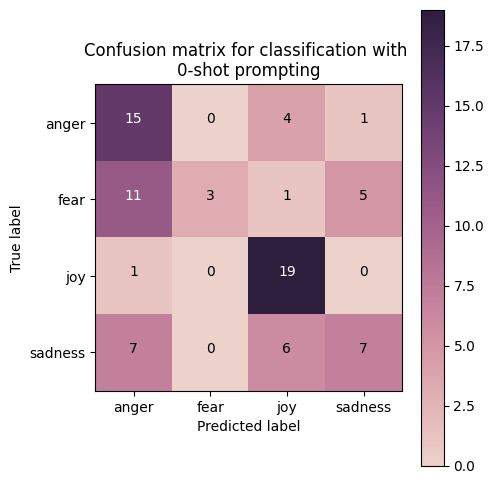

In [42]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Because you offended by the lies of Alexandria Goddard doesn't mean that I'm Deric's friend or anything else. Purely a fishin expedition.
Class: anger

Text: @ANI_news #Pakistan should stop cross border #terrorism if they really need solution for #KashmirIssue. @narendramodi sir, #India should act
Class: fear

Text: It's not that the man did not know how to juggle, he just didn't have the balls to do it.\n #funny #pun #punny  #lol
Class: joy

Text: History repeating itself..GAA is our culture how dare anyone think it's ok to discourage any Irish person from attending any match or final
Class: sadness




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:08<00:02,  2.01it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.16 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:05<00:05,  1.79it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.03 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:02<00:08,  1.87it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.52 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 50.98 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:03,  1.63it/s]

Rate limit of 15 requests per minute reached. Waiting for 50.70 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:54<00:00,  5.71s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 57.50%
              precision    recall  f1-score   support

       anger       0.48      0.55      0.51        20
        fear       0.86      0.30      0.44        20
         joy       0.63      0.95      0.76        20
     sadness       0.50      0.50      0.50        20

    accuracy                           0.57        80
   macro avg       0.62      0.57      0.55        80
weighted avg       0.62      0.57      0.55        80



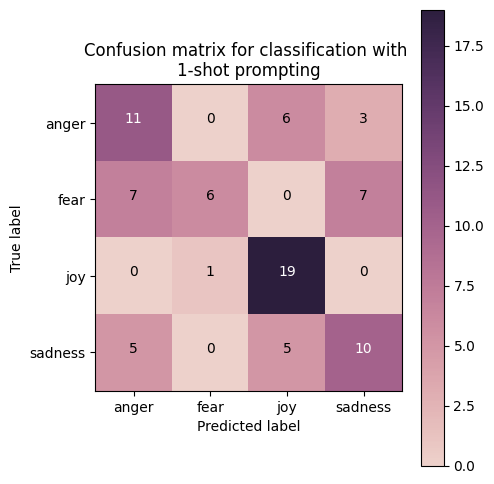

In [43]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Because you offended by the lies of Alexandria Goddard doesn't mean that I'm Deric's friend or anything else. Purely a fishin expedition.
Class: anger

Text: Women don't like girls because we resent them for looking so great/we wish we still looked like that  #washed
Class: anger

Text: @wcsportscamp I lol'ed.  Privileged exasperation should be bottled and sold.
Class: anger

Text: If you be #angry, which may be the case, &amp; which may be unavoidable, see that the sudden excitement does not become sin. #AlbertBarnes
Class: anger

Text: It's easy to hold a grudge harder to let go.
Class: anger

Text: @ANI_news #Pakistan should stop cross border #terrorism if they really need solution for #KashmirIssue. @narendramodi sir, #India should act
Class: fear

Text: Huns are like a box of coffee re

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:08<00:02,  1.84it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.69 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:06<00:06,  1.48it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.52 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:09,  1.65it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.42 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.43 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:59<00:03,  1.45it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.84 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:53<00:00,  5.68s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 66.25%
              precision    recall  f1-score   support

       anger       0.53      0.80      0.64        20
        fear       0.86      0.30      0.44        20
         joy       0.79      0.95      0.86        20
     sadness       0.63      0.60      0.62        20

    accuracy                           0.66        80
   macro avg       0.70      0.66      0.64        80
weighted avg       0.70      0.66      0.64        80



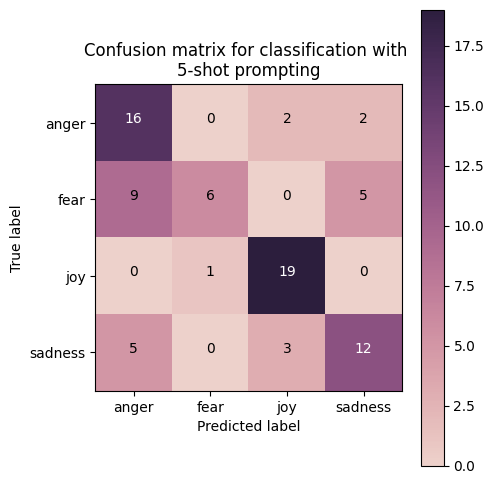

In [44]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

# Answer here
Across the three prompting setups, performance improves consistently as more examples are provided: accuracy rises from 55% (0-shot) to 57.5% (1-shot) and reaches 66.25% (5-shot), with macro F1 increasing from 0.50 → 0.55 → 0.64. Zero-shot prompting shows strong bias toward predicting anger and joy, while fear and sadness suffer from very low recall. With 1-shot prompting, predictions become more balanced, though confusion among negative emotions remains. The 5-shot setting yields the most stable and accurate results, substantially improving anger and sadness classification while further strengthening joy. However, fear remains the most challenging class across all settings, showing limited recall improvements. Overall, providing more in-context examples helps the model establish clearer class boundaries and significantly enhances classification performance.

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [49]:
# Answer here

import pandas as pd
import numpy as np


# ==================== Part 1: Load All Results ====================
print("\nPart 1: Loading Classification Results")
print("-"*80)

# Load the three result files
results_0_shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_0.csv")
results_1_shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_1.csv")
results_5_shot = pd.read_csv("./results/llm_classification_results/results_samples_20_shots_5.csv")

print(f"✓ Loaded 0-shot: {len(results_0_shot)} samples")
print(f"✓ Loaded 1-shot: {len(results_1_shot)} samples")
print(f"✓ Loaded 5-shot: {len(results_5_shot)} samples")

# ==================== Part 2: Merge Results for Analysis ====================
print("\n" + "="*80)
print("Part 2: Merging Results for Comparison")
print("="*80)

# Merge all three dataframes on 'text' column to compare predictions
merged = results_0_shot.copy()
merged = merged.rename(columns={'predicted_emotion': 'pred_0_shot'})
merged = merged.merge(
    results_1_shot[['text', 'predicted_emotion']].rename(columns={'predicted_emotion': 'pred_1_shot'}),
    on='text',
    how='inner'
)
merged = merged.merge(
    results_5_shot[['text', 'predicted_emotion']].rename(columns={'predicted_emotion': 'pred_5_shot'}),
    on='text',
    how='inner'
)

print(f"✓ Merged {len(merged)} samples for analysis")
print(f"✓ Columns: {list(merged.columns)}")

# Add correctness flags for each approach
merged['correct_0_shot'] = (merged['true_emotion'] == merged['pred_0_shot'])
merged['correct_1_shot'] = (merged['true_emotion'] == merged['pred_1_shot'])
merged['correct_5_shot'] = (merged['true_emotion'] == merged['pred_5_shot'])

# ==================== Part 3: Find Different Cases ====================
print("\n" + "="*80)
print("Part 3: Identifying Different Classification Patterns")
print("="*80)

# Case 1: Improves with more examples
improves = merged[
    (~merged['correct_0_shot']) & 
    (merged['correct_5_shot'])
]

# Case 2: Never improves (always wrong)
never_improves = merged[
    (~merged['correct_0_shot']) & 
    (~merged['correct_1_shot']) & 
    (~merged['correct_5_shot'])
]

# Case 3: Gets worse with more examples (right -> wrong)
gets_worse = merged[
    (merged['correct_0_shot']) & 
    (~merged['correct_5_shot'])
]

print(f"\n📈 Cases that IMPROVE with examples: {len(improves)}")
print(f"❌ Cases that NEVER improve (always wrong): {len(never_improves)}")
print(f"📉 Cases that GET WORSE with examples: {len(gets_worse)}")

# ==================== Part 4: Detailed Examples ====================
print("\n" + "="*80)
print("Part 4: Detailed Case Examples")
print("="*80)

# Show examples of each case
print("\n" + "="*40)
print("CASE 1: IMPROVES WITH MORE EXAMPLES")
print("="*40)
if len(improves) > 0:
    for i, row in improves.head(5).iterrows():
        print(f"\nExample {i+1}:")
        print(f"Text: '{row['text'][:100]}...' " if len(row['text']) > 100 else f"Text: '{row['text']}'")
        print(f"True emotion: {row['true_emotion']}")
        print(f"0-shot predicted: {row['pred_0_shot']} {'✗' if not row['correct_0_shot'] else '✓'}")
        print(f"1-shot predicted: {row['pred_1_shot']} {'✗' if not row['correct_1_shot'] else '✓'}")
        print(f"5-shot predicted: {row['pred_5_shot']} {'✗' if not row['correct_5_shot'] else '✓'}")
        print("-"*40)
else:
    print("No cases found where classification improves with more examples.")

print("\n" + "="*40)
print("CASE 2: NEVER IMPROVES (Always Wrong)")
print("="*40)
if len(never_improves) > 0:
    for i, row in never_improves.head(5).iterrows():
        print(f"\nExample {i+1}:")
        print(f"Text: '{row['text'][:100]}...' " if len(row['text']) > 100 else f"Text: '{row['text']}'")
        print(f"True emotion: {row['true_emotion']}")
        print(f"0-shot predicted: {row['pred_0_shot']} ✗")
        print(f"1-shot predicted: {row['pred_1_shot']} ✗")
        print(f"5-shot predicted: {row['pred_5_shot']} ✗")
        print("-"*40)
else:
    print("No cases found that are always wrong.")

print("\n" + "="*40)
print("CASE 3: GETS WORSE With More Examples")
print("="*40)
if len(gets_worse) > 0:
    for i, row in gets_worse.head(5).iterrows():
        print(f"\nExample {i+1}:")
        print(f"Text: '{row['text'][:100]}...' " if len(row['text']) > 100 else f"Text: '{row['text']}'")
        print(f"True emotion: {row['true_emotion']}")
        print(f"0-shot predicted: {row['pred_0_shot']} {'✗' if not row['correct_0_shot'] else '✓'}")
        print(f"1-shot predicted: {row['pred_1_shot']} {'✗' if not row['correct_1_shot'] else '✓'}")
        print(f"5-shot predicted: {row['pred_5_shot']} {'✗' if not row['correct_5_shot'] else '✓'}")
        print("-"*40)
else:
    print("No cases found where classification gets worse.")

# ==================== Part 5: Pattern Analysis ====================
print("\n" + "="*80)
print("Part 5: Pattern Analysis by Emotion")
print("="*80)

# Analyze improvement patterns by emotion
print("\nImprovement Patterns by True Emotion:")
print("-"*40)
for emotion in ['anger', 'fear', 'joy', 'sadness']:
    emotion_data = merged[merged['true_emotion'] == emotion]
    improves_count = len(emotion_data[(~emotion_data['correct_0_shot']) & (emotion_data['correct_5_shot'])])
    never_improves_count = len(emotion_data[(~emotion_data['correct_0_shot']) & 
                                              (~emotion_data['correct_1_shot']) & 
                                              (~emotion_data['correct_5_shot'])])
    gets_worse_count = len(emotion_data[(emotion_data['correct_0_shot']) & 
                                         (~emotion_data['correct_5_shot'])])
    
    print(f"\n{emotion.upper()}:")
    print(f"  Improves: {improves_count}/{len(emotion_data)} ({100*improves_count/len(emotion_data):.1f}%)")
    print(f"  Never improves: {never_improves_count}/{len(emotion_data)} ({100*never_improves_count/len(emotion_data):.1f}%)")
    print(f"  Gets worse: {gets_worse_count}/{len(emotion_data)} ({100*gets_worse_count/len(emotion_data):.1f}%)")

# ==================== Part 6: Confusion Patterns ====================
print("\n" + "="*80)
print("Part 6: Common Confusion Patterns")
print("="*80)

print("\nMost Common Misclassifications in 0-shot:")
confusion_0 = merged[~merged['correct_0_shot']].groupby(['true_emotion', 'pred_0_shot']).size().sort_values(ascending=False)
print(confusion_0.head(10))

print("\nMost Common Misclassifications in 5-shot:")
confusion_5 = merged[~merged['correct_5_shot']].groupby(['true_emotion', 'pred_5_shot']).size().sort_values(ascending=False)
print(confusion_5.head(10))

# ==================== Part 7: Discussion ====================
print("\n" + "="*80)
print("Part 7: Discussion and Findings")
print("="*80)

print(f"""
Out of 80 samples, only 13 cases (16.25%) improved when moving from zero-shot to few-shot prompting, while 25 cases (31.25%) remained incorrect regardless of the number of examples,
and 4 cases (5%) actually became worse, showing that few-shot prompting is not uniformly beneficial. Most improvements come from fear and sadness, where clearer contextual
cues in example shots help the model resolve semantic ambiguity. For example, fear texts often being misread as anger in zero-shot but corrected after adding examples.
However, fear is also the emotion that most often never improves, revealing that its linguistic expressions strongly overlap with anger and sadness, making it difficult
for the model even with 5-shot prompting. In contrast, joy is highly stable, with almost no changes across prompt types. Some anger cases degrade with more shots because
additional examples introduce confusion between anger and sadness, shifting the model's decision boundary. The most frequent misclassifications, such as fear → anger and
sadness → anger, highlight persistent biases toward predicting anger for negative emotional content.
""")



Part 1: Loading Classification Results
--------------------------------------------------------------------------------
✓ Loaded 0-shot: 80 samples
✓ Loaded 1-shot: 80 samples
✓ Loaded 5-shot: 80 samples

Part 2: Merging Results for Comparison
✓ Merged 86 samples for analysis
✓ Columns: ['text', 'true_emotion', 'pred_0_shot', 'pred_1_shot', 'pred_5_shot']

Part 3: Identifying Different Classification Patterns

📈 Cases that IMPROVE with examples: 13
❌ Cases that NEVER improve (always wrong): 25
📉 Cases that GET WORSE with examples: 4

Part 4: Detailed Case Examples

CASE 1: IMPROVES WITH MORE EXAMPLES

Example 6:
Text: '@LiamCannon1 He's just too raging to type properly... Ha ha!'
True emotion: anger
0-shot predicted: joy ✗
1-shot predicted: joy ✗
5-shot predicted: anger ✓
----------------------------------------

Example 23:
Text: '@fluffysoftlouis no no. I insist that you give me your best insult first'
True emotion: anger
0-shot predicted: joy ✗
1-shot predicted: joy ✗
5-shot predic

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---